# Projeto Aprendizado de Máquinas




**Payment Fraud - Empowering Financial Security**

https://www.kaggle.com/datasets/younusmohamed/payment-fraud-empowering-financial-security

---
Column Descriptions

- Column	Type	Description
accountAgeDays	int	Days since the customer account was created.

- numItems	int	Number of items in the cart.

- localTime	float	Local hour of the transaction (decimal).

- paymentMethod	category	Payment instrument (PayPal, StoreCredit, CreditCard, …).

- paymentMethodAgeDays	int	Days since this payment method was linked to the account.

- isWeekend	0/1	Weekend flag (1 weekend, 0 weekday).

- Category	category	Product vertical (Electronics, Shopping, Food, …).

- Label	0/1	Target – 0 legitimate, 1 potential fraud.

---

# Análise exploratória dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('payment_fraud.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [ ]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.499547,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,1.000000,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000,1.000000


<Axes: xlabel='count', ylabel='paymentMethod'>

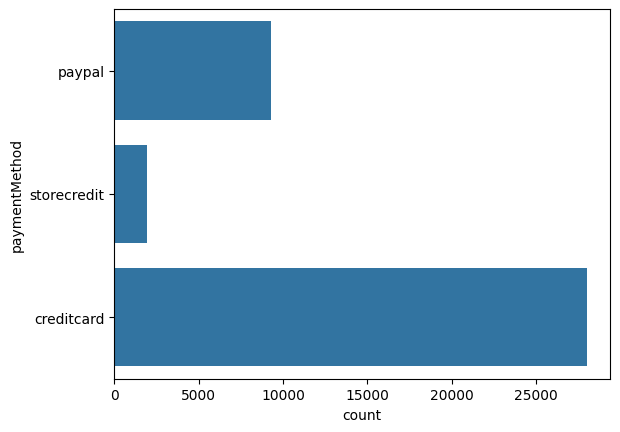

In [ ]:
sns.countplot(df['paymentMethod'])

<Axes: xlabel='count', ylabel='Category'>

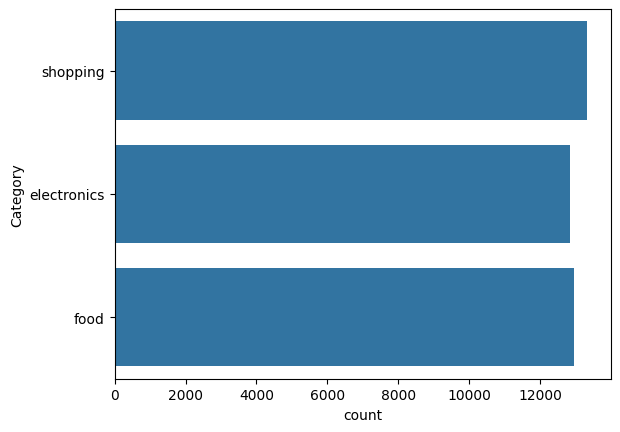

In [ ]:
sns.countplot(df['Category'])

In [ ]:
df['label'].value_counts()

,count
label,
0,38661
1,560


- Dataset Desbalanceado

<Axes: xlabel='accountAgeDays', ylabel='Count'>

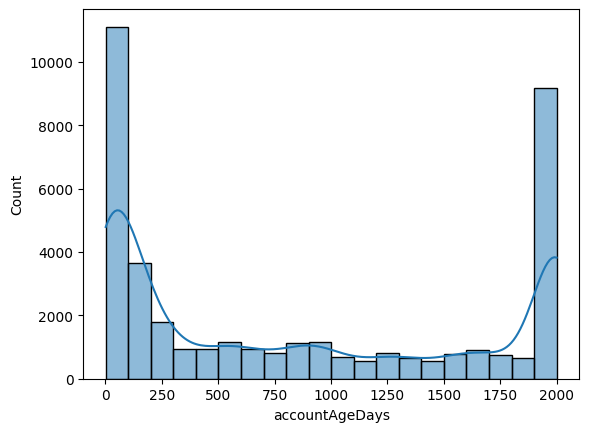

In [ ]:
sns.histplot(df['accountAgeDays'],kde=True)

<Axes: xlabel='paymentMethodAgeDays', ylabel='Count'>

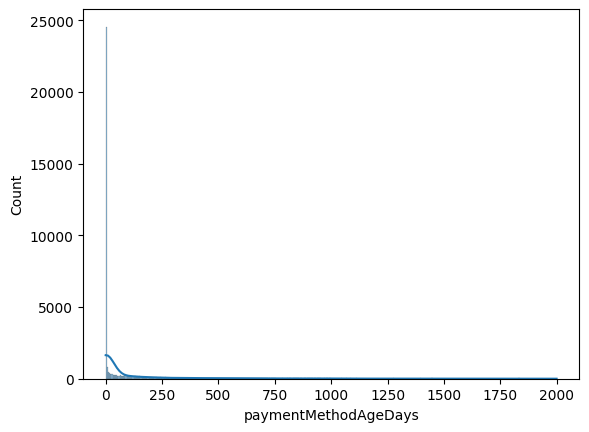

In [ ]:
sns.histplot(df['paymentMethodAgeDays'],kde=True)

<Axes: xlabel='numItems', ylabel='Count'>

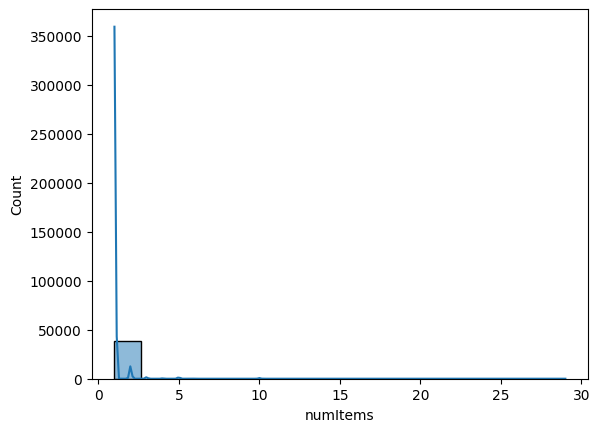

In [ ]:
sns.histplot(df['numItems'],kde=True)

<Axes: xlabel='localTime', ylabel='Count'>

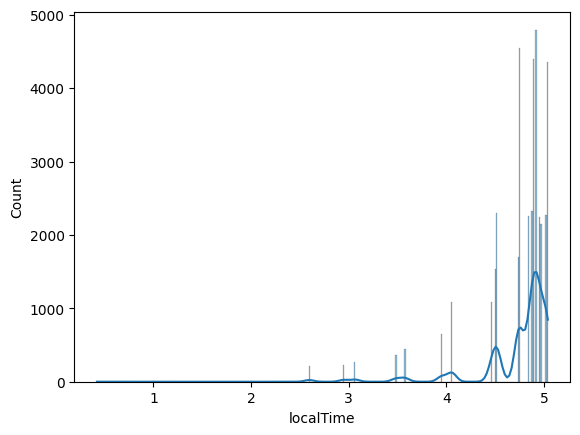

In [ ]:
sns.histplot(df['localTime'],kde=True)

<Axes: >

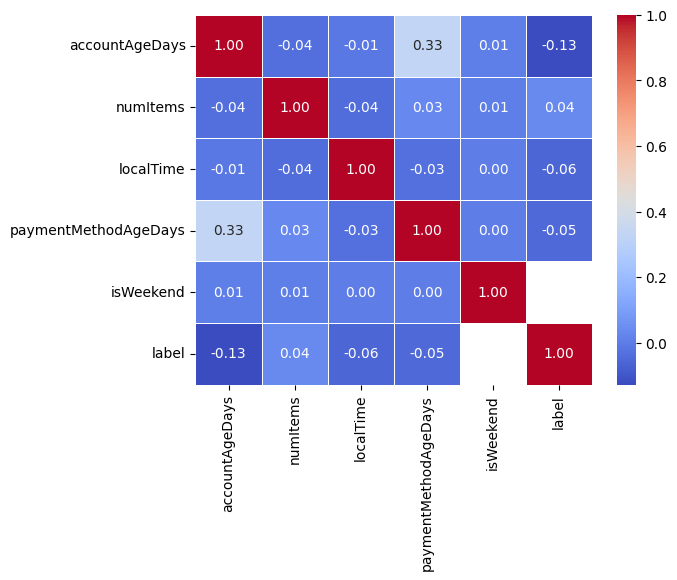

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

- Dados ausentes


In [ ]:
df.isna().sum()

,0
accountAgeDays,0
numItems,0
localTime,0
paymentMethod,0
paymentMethodAgeDays,0
Category,95
isWeekend,560
label,0


- Dados duplicados

In [ ]:
df.duplicated().sum()

np.int64(3033)

# Normalização/Feature Enginering



In [2]:
df['Category'] = df['Category'].fillna('Unknown')
df.drop(columns=['isWeekend'],inplace=True)

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

transformer = ColumnTransformer([
    ('onehot_category', OneHotEncoder(handle_unknown='ignore'), ['Category','paymentMethod']),
    ('scaler', StandardScaler(), ['accountAgeDays', 'paymentMethodAgeDays', 'numItems', 'localTime'])
])

In [4]:
X = df.drop(columns=['label'])
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [5]:
X_train = transformer.fit_transform(X_train)

X_test = transformer.transform(X_test)

In [ ]:
transformer.get_feature_names_out()

array(['onehot_category__Category_Unknown',
       'onehot_category__Category_electronics',
       'onehot_category__Category_food',
       'onehot_category__Category_shopping',
       'onehot_category__paymentMethod_creditcard',
       'onehot_category__paymentMethod_paypal',
       'onehot_category__paymentMethod_storecredit',
       'scaler__accountAgeDays', 'scaler__paymentMethodAgeDays',
       'scaler__numItems', 'scaler__localTime'], dtype=object)

# Logistic Regression

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[Regressão Lógistica] Acurácia: 0.9997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11599
           1       1.00      0.98      0.99       168

    accuracy                           1.00     11767
   macro avg       1.00      0.99      1.00     11767
weighted avg       1.00      1.00      1.00     11767



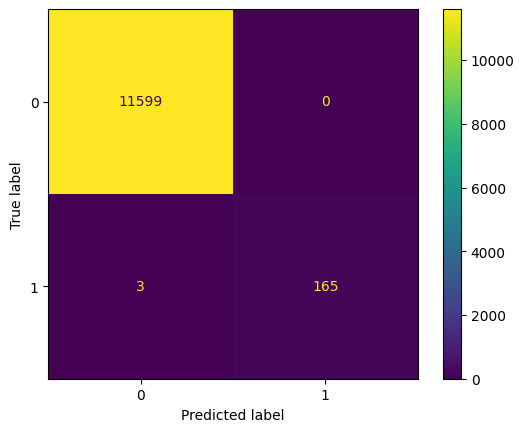

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]
}

lg_clf = LogisticRegression(random_state=42) #class_weight='balanced'
clf = RandomizedSearchCV(
    lg_clf,
    param_grid,
    refit=True,
    cv=5,
    random_state=42
  )

clf.fit(X_train,y_train)
print(f'Melhores parâmetros: {clf.best_params_}')

y_pred_lg_clf = clf.predict(X_test)

print(f'[Regressão Lógistica] Acurácia: {accuracy_score(y_test,y_pred_lg_clf):.4f}')
print(classification_report(y_test,y_pred_lg_clf))
cm = confusion_matrix(y_test,y_pred_lg_clf)
cmd = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
cmd.plot()
plt.show()

- Pesquisar sobre regulação L2

- Ajuste no C[regularização] melhora o Overfitting

# Decision Tree

Melhores parâmetros: {'min_samples_leaf': 1, 'max_depth': 1}
[Decision Tree] Acurácia: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11599
           1       1.00      1.00      1.00       168

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



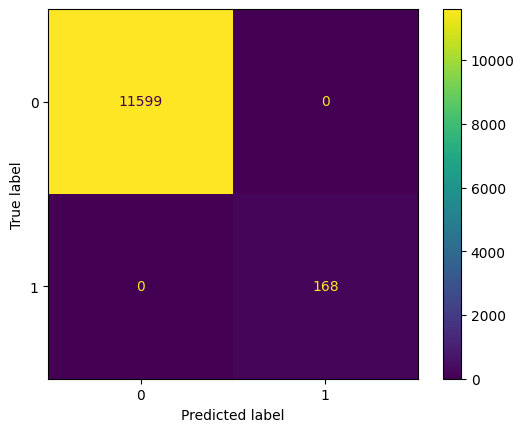

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid={
  'max_depth': [1,3,5,7],
  'min_samples_leaf': [1,3,5,7]
}

decision_tree = DecisionTreeClassifier(random_state=42)

clf = RandomizedSearchCV(
    decision_tree,
    param_grid,
    cv=5,
    scoring='accuracy',
    refit=True,
    random_state=42
)

clf.fit(X_train,y_train)
print(f'Melhores parâmetros: {clf.best_params_}')

y_pred_dt = clf.predict(X_test)

print(f'[Decision Tree] Acurácia: {accuracy_score(y_test,y_pred_dt):.4f}')
print(classification_report(y_test,y_pred_dt))
cm = confusion_matrix(y_test,y_pred_dt)
cmd = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
cmd.plot()
plt.show()

# SVM

Melhores parâmetros: {'gamma': 0.1, 'C': 100000}
[SVM] Acurácia: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11599
           1       0.96      0.99      0.98       168

    accuracy                           1.00     11767
   macro avg       0.98      1.00      0.99     11767
weighted avg       1.00      1.00      1.00     11767



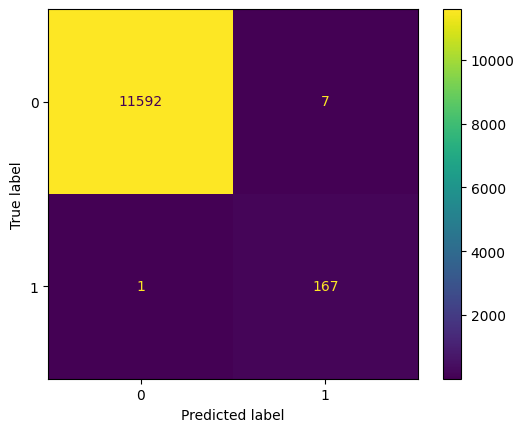

In [ ]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'gamma': [0.01, 0.1, 1,'scale'],
}

clf_svm = SVC(class_weight='balanced',random_state=42)

clf = RandomizedSearchCV(
    clf_svm,
    param_grid,
    cv=5,
    refit=True,
    scoring='accuracy',
    random_state=42
    )

clf.fit(X_train,y_train)
print(f'Melhores parâmetros: {clf.best_params_}')

y_pred_svm = clf.predict(X_test)

print(f'[SVM] Acurácia: {accuracy_score(y_test,y_pred_svm):.4f}')
print(classification_report(y_test,y_pred_svm))
cm = confusion_matrix(y_test,y_pred_svm)
cmd = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
cmd.plot()
plt.show()

# Rede Neural

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS R

Melhores parâmetros: {'solver': 'lbfgs', 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (64, 48, 32, 18), 'activation': 'tanh'}
[MLP] Acurácia: 0.9992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11599
           1       0.95      0.99      0.97       168

    accuracy                           1.00     11767
   macro avg       0.98      0.99      0.99     11767
weighted avg       1.00      1.00      1.00     11767



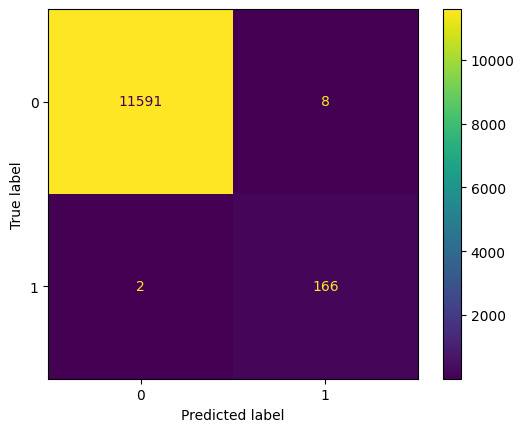

In [ ]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(128,64,32),(28,14,10),(100,50,25),(64,48,32,18)],
    'activation': ['tanh','relu','sigmoid'],
    'solver': ['sgd','adam','lbfgs'],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init': [0.0001,0.001, 0.01, 0.1]
}

mlp = MLPClassifier(early_stopping=True,shuffle=True,random_state=42,max_iter=1000)

clf = RandomizedSearchCV(
    mlp,
    param_grid,
    cv=5,
    refit=True,
    scoring='accuracy',
    random_state=42
)

clf.fit(X_train,y_train)
print(f'Melhores parâmetros: {clf.best_params_}')

y_pred_mlp = clf.predict(X_test)

print(f'[MLP] Acurácia: {accuracy_score(y_test,y_pred_mlp):.4f}')
print(classification_report(y_test,y_pred_mlp))
cm = confusion_matrix(y_test,y_pred_mlp)
cmd = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
cmd.plot()
plt.show()

# Random Forest

Melhores parâmetros: {'n_estimators': 100, 'min_samples_leaf': 5, 'max_depth': 3}
[Random Forest] Acurácia: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11599
           1       1.00      1.00      1.00       168

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



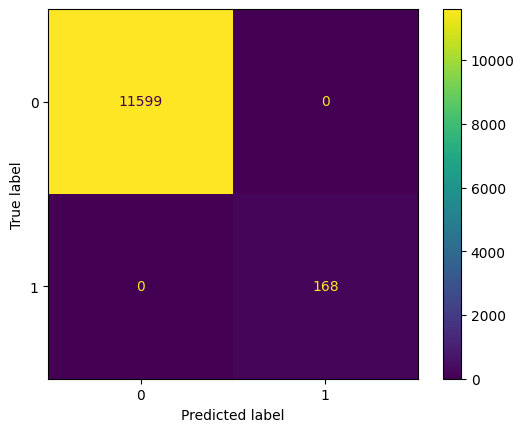

In [7]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [1,3,5,7],
    'min_samples_leaf': [1,3,5,7]
}

rf_clf = RandomForestClassifier(class_weight="balanced",random_state=42)

clf = RandomizedSearchCV(
    rf_clf,
    param_grid,
    scoring="accuracy",
    cv=5,
    refit=True,
    random_state=42
    )

clf.fit(X_train,y_train)
print(f'Melhores parâmetros: {clf.best_params_}')

y_pred_rf = clf.predict(X_test)

print(f'[Random Forest] Acurácia: {accuracy_score(y_test,y_pred_rf):.4f}')
print(classification_report(y_test,y_pred_rf))
cm = confusion_matrix(y_test,y_pred_rf)
cmd = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
cmd.plot()
plt.show()

# AdaBoost

Melhores parâmetros: {'n_estimators': 400, 'learning_rate': 0.1}
[AdaBoosting] Acurácia: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11599
           1       1.00      1.00      1.00       168

    accuracy                           1.00     11767
   macro avg       1.00      1.00      1.00     11767
weighted avg       1.00      1.00      1.00     11767



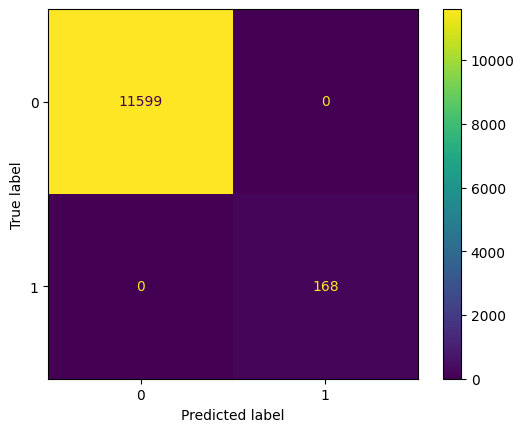

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate': [0.01,0.1,1,10,100]
}

ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),random_state=42)

clf = RandomizedSearchCV(
    ada_clf,
    param_grid,
    scoring="accuracy",
    cv=5,
    refit=True,
    random_state=42
)

clf.fit(X_train,y_train)

print(f'Melhores parâmetros: {clf.best_params_}')

y_pred_ada = clf.predict(X_test)

print(f'[AdaBoosting] Acurácia: {accuracy_score(y_test,y_pred_ada):.4f}')
print(classification_report(y_test,y_pred_ada))
cm = confusion_matrix(y_test,y_pred_ada)
cmd = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
cmd.plot()
plt.show()

# Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
